# SVR

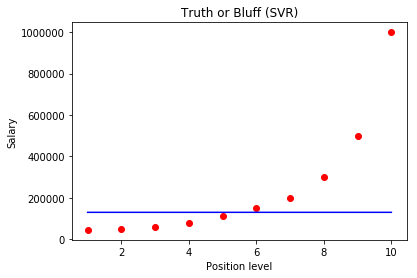

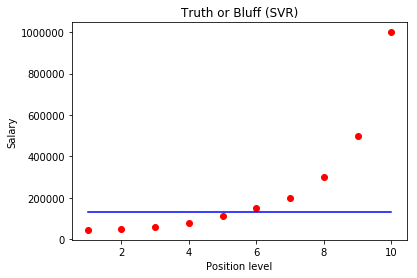

In [1]:
# Importing the libraries
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#graph can be display in windows
# plt.switch_backend('TkAgg') 

# Importing the dataset
dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(6.5)
#y_pred = sc_y.inverse_transform(y_pred)

# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [3]:
def svr(X, y, test):

    print("x=/n",X.shape)
    print("y=/n",y.shape)

    #ToDo:
    # When to use scaling features
    # Feature Scaling
    #from sklearn.preprocessing import StandardScaler
    #sc_X = StandardScaler()
    #sc_y = StandardScaler()
    #X = sc_X.fit_transform(X)
    #y = sc_y.fit_transform(y)


    #ToDo: set the appropriate variables for SVR to better match our test
    # Fitting SVR to the dataset
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X, y)

    # Predicting a new result
    y_pred = regressor.predict(test[1])
    #y_pred = sc_y.inverse_transform(y_pred)
    print("Prediction = {}, Real Value = {}".format(y_pred, test[0]))

    # Visualizing the SVR results
    plt.scatter(X, y, color = 'red')
    plt.plot(X, regressor.predict(X), color = 'blue')
    plt.title('Truth or Bluff (SVR)')
    plt.xlabel('stock value differnce')
    plt.ylabel('Days')
    plt.show()

    # Visualizing the SVR results (for higher resolution and smoother curve)
    X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'red')
    plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
    plt.title('Truth or Bluff (SVR)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

[ 3.390015 -1.089996  2.929992  5.200012 -0.670013  4.399994 10.600006
 -5.420013 -6.309998]
(9, 1)
x=/n (9, 1)
y=/n (9,)
Prediction = [2.35774826], Real Value = -6.76998900000001


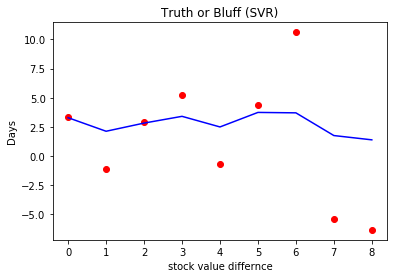

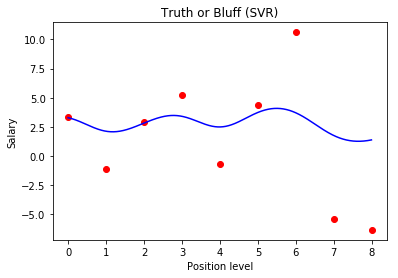

In [4]:
###################################################################################
## selfRun
## for testing or example purpose 
###################################################################################
# Importing the dataset
dataset = pd.read_csv('./data/TSLA.csv')

''''
The format of the csv file looks like this
Date,Open,High,Low,Close,Adj Close,Volume
2010-06-29,19.0,25.0,17.540001,23.889999,23.889999,18766300
In other to get High as x(features) we can slide our data 
'''
stock_high = dataset.iloc[:, 1].values

''' get the last 10 stocks 
[338.630005 337.540009 340.470001 345.670013 345. 349.399994
360. 354.579987 348.269989]         
and get the difference with the last one                  '''

y = ((stock_high[-10:-1] - stock_high[-11:-2]))
print (y)

#create an array range from 0 to len(y) 
X = np.arange(len(y)).reshape(len(y),1)
print(X.shape)

#create a test value to confirm the accuracy of the prediction
test = stock_high[-1] - stock_high[-2]
test = (test, 9)

svr(X, y, test)